In [1]:
Quote = ("Commit to the Lord whatever you do, and he will establish your plans.")
Book = (" Proverbs 16:3")
print(Quote + Book)
print("Notebook written by Milton Abreu! Date: 2020 - 07 - 26")

Commit to the Lord whatever you do, and he will establish your plans. Proverbs 16:3
Notebook written by Milton Abreu! Date: 2020 - 07 - 26


In [2]:
# Libraries
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Loading the data and taking a first look
Aksum_res = pd.read_csv("Aksum_Empty_Campus.csv") # Aksum Residence
Maps_res = pd.read_csv("MAPS_EMPTY_CAMPUS.csv") # Maps Residence
Songhai_res = pd.read_csv("Songhai_Empty_Campus.csv") # Songhai Residence
Aksum_res.head(100) # uncomment to take a look at the first 100 rows of the data set

,Date,Voltage Red-Phase: Songhai (V),Voltage White-Phase: Songhai (V),Voltage Blue-Phase: Songhai (V),Current Red-Phase: Songhai (A),Current White-Phase: Songhai (A),Current Blue-Phase: Songhai (A),Total Active Power: Songhai (kW),Active Power Red-Phase: Songhai (kW),Active Power White-Phase: Songhai (kW),...,Total Demand:Songhai (kVA),Demand Red-Phase: Songhai (kVA),Demand White-Phase: Songhai (kVA),Demand Blue-Phase: Songhai (kVA),Total Power Factor,Power Factor Red-Phase: Songhai,Power Factor White-Phase: Songhai,Power Factor Blue-Phase: Songhai,Total Power Consumed: Songhai (kWh),Frequency (Hz): Songhai
0,01/04/2020 00:00,238.7,238.6,238.2,1.8,0.0,1.4,0.6,0.4,0.0,...,0.7,0.4,0.0,0.3,0.80,0.91,1.0,0.60,0.6,50.0
1,01/04/2020 01:00,239.3,239.1,238.9,1.8,0.0,1.4,0.6,0.4,0.0,...,0.7,0.4,0.0,0.3,0.80,0.93,1.0,0.60,0.6,50.0
2,01/04/2020 02:00,239.7,239.6,239.3,1.7,0.0,1.2,0.6,0.3,0.0,...,0.6,0.4,0.0,0.3,0.91,0.94,1.0,0.86,0.6,50.1
3,01/04/2020 03:00,240.0,239.8,239.7,1.8,0.0,1.5,0.6,0.4,0.0,...,0.7,0.4,0.0,0.3,0.81,0.92,1.0,0.63,0.6,50.0
4,01/04/2020 04:00,239.9,239.7,239.6,1.7,0.0,1.2,0.5,0.3,0.0,...,0.6,0.4,0.0,0.3,0.83,0.93,1.0,0.62,0.5,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,04/04/2020 23:00,238.3,238.4,238.0,1.8,0.0,1.1,0.5,0.4,0.0,...,0.6,0.4,0.0,0.3,0.83,0.93,1.0,0.62,0.5,50.2
96,05/04/2020 00:00,238.7,238.8,238.4,1.7,0.0,1.1,0.5,0.3,0.0,...,0.6,0.4,0.0,0.3,0.84,0.95,1.0,0.61,0.5,50.2
97,05/04/2020 01:00,237.8,237.7,237.5,1.7,0.0,1.1,0.5,0.3,0.0,...,0.6,0.4,0.0,0.2,0.84,0.94,1.0,0.61,0.5,50.0
98,05/04/2020 02:00,238.6,238.5,238.2,1.7,0.0,1.1,0.5,0.4,0.0,...,0.6,0.4,0.0,0.3,0.85,0.93,1.0,0.67,0.5,50.1


In [4]:
# Renaming a column that was wrongly labeled/named
Aksum_res = Aksum_res.rename(columns={x:x.replace('Songhai', 'Aksum') for x in Aksum_res.columns})
Aksum_res.columns

Index(['Date', 'Voltage Red-Phase: Aksum (V) ',
       'Voltage White-Phase: Aksum (V)', 'Voltage Blue-Phase: Aksum (V) ',
       'Current Red-Phase: Aksum (A)', 'Current White-Phase: Aksum (A)',
       'Current Blue-Phase: Aksum (A)', 'Total Active Power: Aksum (kW)',
       'Active Power Red-Phase: Aksum (kW)',
       'Active Power White-Phase: Aksum (kW)',
       'Active Power Blue-Phase: Aksum (kW)',
       'Total Reactive Power: Aksum (kVAr) ',
       'Reactive Power Red-Phase: Aksum (kVAr)',
       'Reactive Power White-Phase: Aksum (kVAr)',
       'Reactive Power Blue-Phase: Aksum (kVAr)', 'Total Demand:Aksum (kVA)',
       'Demand Red-Phase: Aksum (kVA)', 'Demand White-Phase: Aksum (kVA)',
       'Demand Blue-Phase: Aksum (kVA)', 'Total Power Factor',
       'Power Factor Red-Phase: Aksum', 'Power Factor White-Phase: Aksum',
       'Power Factor Blue-Phase: Aksum', 'Total Power Consumed: Aksum (kWh) ',
       'Frequency (Hz): Aksum '],
      dtype='object')

In [5]:
# Converting the date column values to a datetime data type 
Aksum_res['Date'] = pd.to_datetime(Aksum_res['Date'],format='%d/%m/%Y %H:%M')
Maps_res['Date'] = pd.to_datetime(Maps_res['Date'],format='%d/%m/%Y %H:%M')
Songhai_res['Date'] = pd.to_datetime(Songhai_res['Date'],format='%d/%m/%Y %H:%M')
Aksum_res['Date'] # Uncomment to check it out

# Data on hourly basis
Aksum_res_hour = Aksum_res.groupby(Aksum_res.Date.dt.time).mean()
Maps_res_hour = Maps_res.groupby(Maps_res.Date.dt.time).mean()
Songhai_res_hour = Songhai_res.groupby(Songhai_res.Date.dt.time).mean()

In [6]:
# Subsetting the data into three groups: Voltage, Current, Power and Frequency

# Getting the voltage
Aksum_volt = Aksum_res.filter(['Voltage Red-Phase: Aksum (V) ','Voltage White-Phase: Aksum (V)', 'Voltage Blue-Phase: Aksum (V) '], axis = 1)
Maps_volt = Maps_res.filter(['Voltage Red-Phase: Maps (V) ', 'Voltage White-Phase: Maps (V)','Voltage Blue-Phase: Maps (V) '], axis = 1)
Songhai_volt = Songhai_res.filter(['Voltage Red-Phase: Songhai (V) ','Voltage White-Phase: Songhai (V)', 'Voltage Blue-Phase: Songhai (V) '], axis = 1)
#Aksum_volt.to_csv(r'C:\Users\MILTON ABREU\Documents\Data_books\Final_Analysis\Clean_Data\Voltage.csv') # save it as csv file

# Getting the current
Aksum_current = Aksum_res.filter(['Current Red-Phase: Aksum (A)','Current White-Phase: Aksum (A)','Current Blue-Phase: Aksum (A)'], axis = 1)
Maps_current = Maps_res.filter(['Current Red-Phase: Maps (A)','Current White-Phase: Maps (A)','Current Blue-Phase: Maps (A)'], axis = 1)
Songhai_current = Songhai_res.filter(['Current Red-Phase: Songhai (A)','Current White-Phase: Songhai (A)','Current Blue-Phase: Songhai (A)'], axis = 1)
#Aksum_current.to_csv(r'C:\Users\MILTON ABREU\Documents\Data_books\Final_Analysis\Clean_Data\Current.csv') # save it as csv file

#Getting the frequency
Aksum_Freq = Aksum_res.filter([ 'Frequency (Hz): Aksum '],axis = 1)
Maps_Freq = Maps_res.filter(['Frequency (Hz): Maps'],axis = 1)
Songhai_Freq = Songhai_res.filter(['Frequency (Hz): Songhai'],axis = 1)
#Aksum_Freq.to_csv(r'C:\Users\MILTON ABREU\Documents\Data_books\Final_Analysis\Clean_Data\Frequency.csv') # save it as csv file     

#Getting the Power
Songhai_power = Songhai_res.filter(['Total Active Power: Songhai (kW)','Active Power Red-Phase: Songhai (kW)','Active Power White-Phase: Songhai (kW)','Active Power Blue-Phase: Songhai (kW)'], axis = 1)
Maps_power = Maps_res.filter(['Total Active Power: Maps (kW)','Active Power Red-Phase: Maps (kW)','Active Power White-Phase: Maps (kW)','Active Power Blue-Phase: Maps (kW)'],axis = 1)
Aksum_power = Aksum_res.filter(['Total Active Power: Aksum (kW)','Active Power Red-Phase: Aksum (kW)','Active Power White-Phase: Aksum (kW)','Active Power Blue-Phase: Aksum (kW)'], axis = 1)
#Aksum_power.to_csv(r'C:\Users\MILTON ABREU\Documents\Data_books\Final_Analysis\Clean_Data\Frequency.csv') # save it as csv file   


In [7]:
# Cleaning the data
Aksum_volt.index = Aksum_res['Date'];Maps_volt.index = Maps_res['Date']; Songhai_volt.index = Songhai_res['Date']; # Set date as the dataframe indice
Aksum_volt = Aksum_volt.replace(0,np.NaN); Maps_volt = Maps_volt.replace(0,np.NaN); Songhai_volt = Songhai_volt.replace(0,np.NaN) # Replace zeros with nan and then drop it
Aksum_volt.dropna(axis = 0, how ='any');Maps_volt.dropna(axis = 0, how ='any');Songhai_volt.dropna(axis = 0, how ='any') # Getting rid of the empty cells or 'missing data'

Aksum_current.index = Aksum_res['Date'];Maps_current.index = Maps_res['Date']; Songhai_current.index = Songhai_res['Date']; # Set date as the dataframe indice
Aksum_current = Aksum_current.replace(0,np.NaN); Maps_current = Maps_current.replace(0,np.NaN); Songhai_current = Songhai_current.replace(0,np.NaN) # Replace zeros with nan and then drop it
Aksum_current.dropna(axis = 0, how ='any');Maps_current.dropna(axis = 0, how ='any');Songhai_current.dropna(axis = 0, how ='any') # Getting rid of the empty cells or 'missing data'

Aksum_Freq.index = Aksum_res['Date'];Maps_Freq.index = Maps_res['Date']; Songhai_Freq.index = Songhai_res['Date']; # Set date as the dataframe indice
Aksum_Freq = Aksum_Freq.replace(0,np.NaN); Maps_Freq = Maps_Freq.replace(0,np.NaN); Songhai_Freq = Songhai_Freq.replace(0,np.NaN) # Replace zeros with nan and then drop it
Aksum_Freq.dropna(axis = 0, how ='any');Maps_Freq.dropna(axis = 0, how ='any');Songhai_Freq.dropna(axis = 0, how ='any') # Getting rid of the empty cells or 'missing data'

Songhai_power.index = Songhai_res['Date'];Maps_power.index = Maps_res['Date'];Aksum_power.index = Aksum_res['Date']
Songhai_power = Songhai_power.replace(0,np.NaN);Maps_power = Maps_power.replace(0,np.NaN);Aksum_power = Aksum_power.replace(0,np.NaN)
Songhai_power.dropna(axis = 0, how ='any');Maps_power.dropna(axis = 0, how ='any');Aksum_power.dropna(axis = 0, how ='any')

Aksum_Freq.eq(0).any() # Checking if there is any cell with a zero value


Frequency (Hz): Aksum     False
dtype: bool

In [8]:
# Grouping the data and subseting it - Initial Analysis
## Group the data by month, and take the mean for each group (i.e. each month)
VM_AK = Aksum_volt.resample('M').sum() # sum of data on montly basis
PM_AK = Aksum_power.resample('M').sum()

VM_MA = Maps_volt.resample('M').sum() # sum of data on montly basis
PM_MA = Maps_power.resample('M').sum()

VM_SO = Songhai_volt.resample('M').sum() # sum of data on montly basis
PM_SO = Songhai_power.resample('M').sum()

VW_AK = Aksum_volt.resample('W').sum() # sum of the data on weekly basis
PW_AK = Aksum_power.resample('W').sum()

VW_MA = Maps_volt.resample('W').sum()# sum of the data on weekly basis
PW_MA = Maps_power.resample('W').sum()

VW_SO = Songhai_volt.resample('W').sum()# sum of the data on weekly basis
PW_SO = Songhai_power.resample('W').sum()

VD_AK = Aksum_volt.resample('D').mean()# sum of the data on daily basis
PD_AK = Aksum_power.resample('D').sum()

VD_MA = Maps_volt.resample('D').mean()# sum of the data on daily basis
PD_MA = Maps_power.resample('D').sum()

VD_SO = Songhai_volt.resample('D').sum()# sum of the data on daily basis
PD_SO = Songhai_power.resample('D').sum()

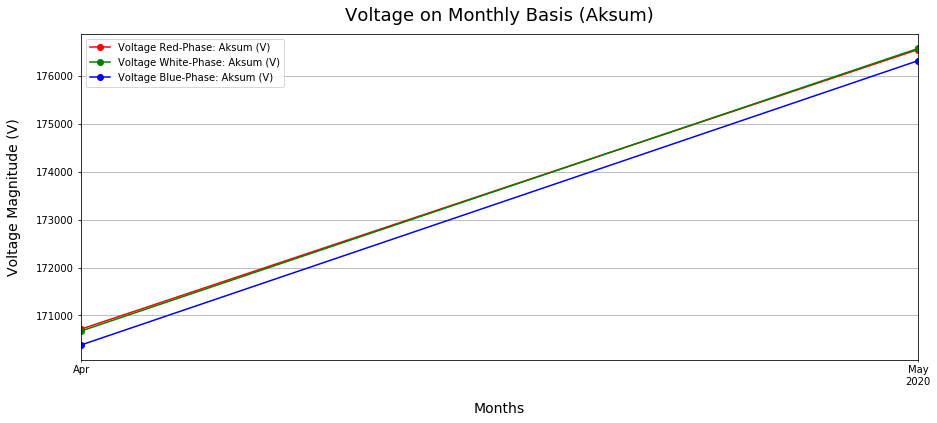

In [9]:
fig = plt.figure(figsize=(15, 6)) # Setting the right size for the graph
ax = plt.gca() # gca stands for 'get current axis'

## Monthly basis - Voltage graphs for sum
VM_AK.plot(kind='line', y=['Voltage Red-Phase: Aksum (V) ','Voltage White-Phase: Aksum (V)', 'Voltage Blue-Phase: Aksum (V) '], color=['red', 'green','blue'],marker='o', ax=ax)

plt.title("Voltage on Monthly Basis (Aksum)", fontsize=18, y=1.02)
plt.xlabel("Months", fontsize=14, labelpad=15)
plt.ylabel("Voltage Magnitude (V)", fontsize=14, labelpad=15)
plt.grid(True)
#fig.savefig(r'C:\Users\MILTON ABREU\Documents\Data_books\Graphs\Voltage_sum2.jpg')# uncomment to save the image


In [10]:
coefficients, residuals, _, _, _ = np.polyfit(range(len(VM_AK.index)),VM_AK,1,full=True)
print('Slope per phase - Month of April: '+ str(coefficients[0]) +'\n Slope per phase - Month of May '+ str(coefficients[1]))


Slope per phase - Month of April: [5845.6 5908.1 5944.3]
 Slope per phase - Month of May [170715.4 170675.3 170383.5]


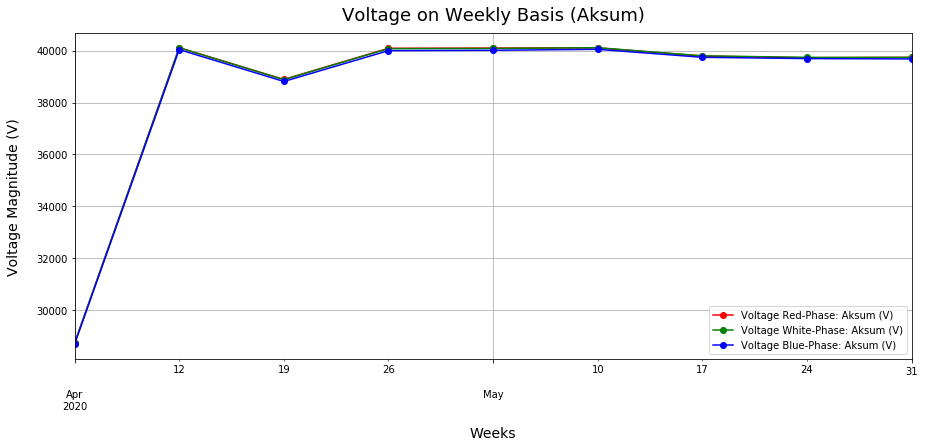

In [11]:
fig = plt.figure(figsize=(15, 6)) # Setting the right size for the graph
ax = plt.gca() # gca stands for 'get current axis'

## Monthly basis - Voltage graphs for sum
VW_AK.plot(kind='line', y=['Voltage Red-Phase: Aksum (V) ','Voltage White-Phase: Aksum (V)', 'Voltage Blue-Phase: Aksum (V) '], color=['red', 'green','blue'],marker='o', ax=ax)

plt.title("Voltage on Weekly Basis (Aksum)", fontsize=18, y=1.02)
plt.xlabel("Weeks", fontsize=14, labelpad=15)
plt.ylabel("Voltage Magnitude (V)", fontsize=14, labelpad=15)
plt.grid(True)
#fig.savefig(r'C:\Users\MILTON ABREU\Documents\Data_books\Graphs\Voltage_sum2.jpg')# uncomment to save the image


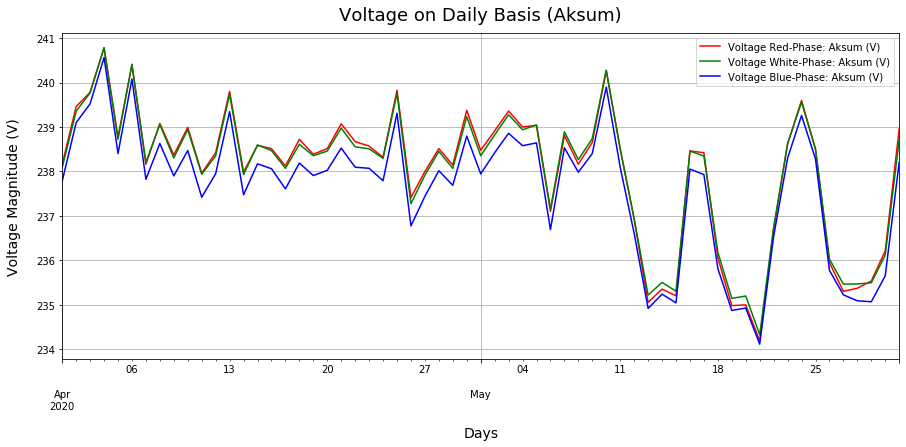

In [12]:
fig = plt.figure(figsize=(15, 6)) # Setting the right size for the graph
ax = plt.gca() # gca stands for 'get current axis'

## Monthly basis - Voltage graphs for sum
VD_AK.plot(kind='line', y=['Voltage Red-Phase: Aksum (V) ','Voltage White-Phase: Aksum (V)', 'Voltage Blue-Phase: Aksum (V) '], color=['red', 'green','blue'], ax=ax)

plt.title("Voltage on Daily Basis (Aksum)", fontsize=18, y=1.02)
plt.xlabel("Days", fontsize=14, labelpad=15)
plt.ylabel("Voltage Magnitude (V)", fontsize=14, labelpad=15)
plt.grid(True)
#fig.savefig(r'C:\Users\MILTON ABREU\Documents\Data_books\Graphs\Voltage_sum2.jpg')# uncomment to save the image


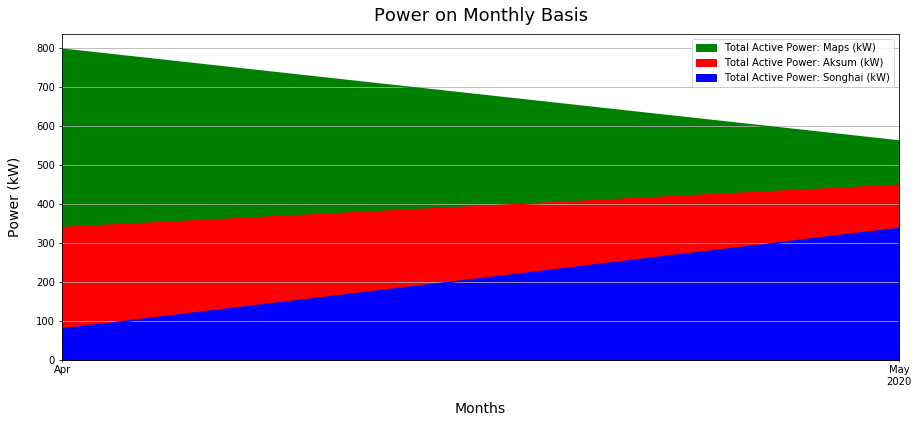

In [13]:
fig = plt.figure(figsize=(15, 6)) # Setting the right size for the graph
ax = plt.gca() # gca stands for 'get current axis'

## Monthly basis - Voltage graphs for sum
PM_MA.plot(kind='area', y=['Total Active Power: Maps (kW)'], color=['green'], ax=ax)
PM_AK.plot(kind='area', y=['Total Active Power: Aksum (kW)'], color=['red'], ax=ax)
PM_SO.plot(kind='area', y=['Total Active Power: Songhai (kW)'], color=['blue'], ax=ax)

plt.title("Power on Monthly Basis", fontsize=18, y=1.02)
plt.xlabel("Months", fontsize=14, labelpad=15)
plt.ylabel("Power (kW)", fontsize=14, labelpad=15)
plt.grid(True)
#fig.savefig(r'C:\Users\MILTON ABREU\Documents\Data_books\Graphs\Voltage_sum2.jpg')# uncomment to save the image

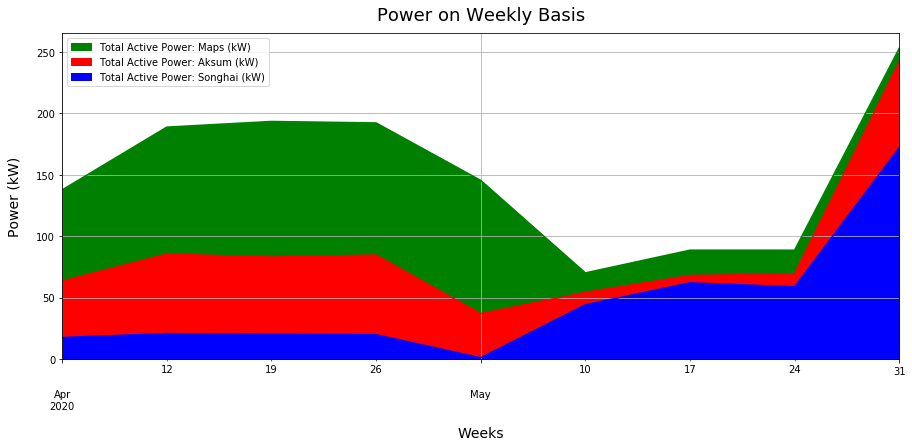

In [14]:
fig = plt.figure(figsize=(15, 6)) # Setting the right size for the graph
ax = plt.gca() # gca stands for 'get current axis'

## Monthly basis - Voltage graphs for sum
PW_MA.plot(kind='area', y=['Total Active Power: Maps (kW)'], color=['green'], ax=ax)
PW_AK.plot(kind='area', y=['Total Active Power: Aksum (kW)'], color=['red'], ax=ax)
PW_SO.plot(kind='area', y=['Total Active Power: Songhai (kW)'], color=['blue'], ax=ax)

plt.title("Power on Weekly Basis", fontsize=18, y=1.02)
plt.xlabel("Weeks", fontsize=14, labelpad=15)
plt.ylabel("Power (kW)", fontsize=14, labelpad=15)
plt.grid(True)
#fig.savefig(r'C:\Users\MILTON ABREU\Documents\Data_books\Graphs\Voltage_sum2.jpg')# uncomment to save the image

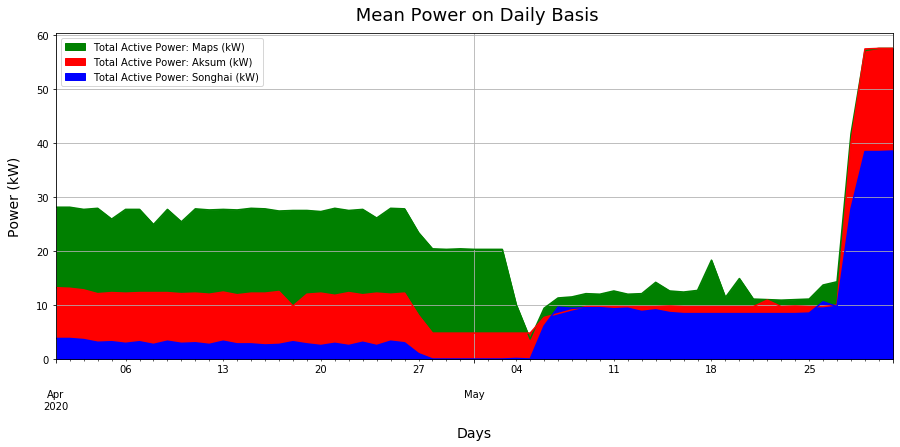

In [15]:
fig = plt.figure(figsize=(15, 6)) # Setting the right size for the graph
ax = plt.gca() # gca stands for 'get current axis'

## Monthly basis - Voltage graphs for sum
PD_MA.plot(kind='area', y=['Total Active Power: Maps (kW)'], color=['green'], ax=ax)
PD_AK.plot(kind='area', y=['Total Active Power: Aksum (kW)'], color=['red'], ax=ax)
PD_SO.plot(kind='area', y=['Total Active Power: Songhai (kW)'], color=['blue'], ax=ax)

plt.title(" Mean Power on Daily Basis", fontsize=18, y=1.02)
plt.xlabel("Days", fontsize=14, labelpad=15)
plt.ylabel("Power (kW)", fontsize=14, labelpad=15)
plt.grid(True)
#fig.savefig(r'C:\Users\MILTON ABREU\Documents\Data_books\Graphs\Voltage_sum2.jpg')# uncomment to save the image

In [16]:
P_list1 = []
A = PM_MA.sum(); B = PM_AK.sum(); C = PD_SO.sum()
#PD_MA.min()#; PD_AK.min()#; PD_SO.min()
#PD_MA.max(); PD_AK.max(); PD_SO.max()

PM_AK['Total Active Power: Aksum (kW)'].mean() * 12
#PM_MA['Total Active Power: Maps (kW)'].mean() * 12
#PM_SO['Total Active Power: Songhai (kW)'].mean() * 12


4720.200000000003

In [17]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(PD_SO[PD_SO<=1.0]) # check the whole dataset


            Total Active Power: Songhai (kW)  \
Date                                           
2020-04-01                               NaN   
2020-04-02                               NaN   
2020-04-03                               NaN   
2020-04-04                               NaN   
2020-04-05                               NaN   
2020-04-06                               NaN   
2020-04-07                               NaN   
2020-04-08                               NaN   
2020-04-09                               NaN   
2020-04-10                               NaN   
2020-04-11                               NaN   
2020-04-12                               NaN   
2020-04-13                               NaN   
2020-04-14                               NaN   
2020-04-15                               NaN   
2020-04-16                               NaN   
2020-04-17                               NaN   
2020-04-18                               NaN   
2020-04-19                              

In [18]:
Maps_res_hour.columns

Index(['Voltage Red-Phase: Maps (V) ', 'Voltage White-Phase: Maps (V)',
       'Voltage Blue-Phase: Maps (V) ', 'Current Red-Phase: Maps (A)',
       'Current White-Phase: Maps (A)', 'Current Blue-Phase: Maps (A)',
       'Total Active Power: Maps (kW)', 'Active Power Red-Phase: Maps (kW)',
       'Active Power White-Phase: Maps (kW)',
       'Active Power Blue-Phase: Maps (kW)',
       'Total Reactive Power: Maps (kVAr) ',
       'Reactive Power Red-Phase: Maps (kVAr)',
       'Reactive Power White-Phase: Maps (kVAr)',
       'Reactive Power Blue-Phase: Maps (kVAr)', 'Total Demand:Maps (kVA)',
       'Demand Red-Phase: Maps (kVA)', 'Demand White-Phase: Maps (kVA)',
       'Demand Blue-Phase: Maps (kVA)', 'Total Power Factor',
       'Power Factor Red-Phase: Maps', 'Power Factor White-Phase: Maps',
       'Power Factor Blue-Phase: Maps', 'Total Power Consumed: Maps (kWh) ',
       'Frequency (Hz): Maps '],
      dtype='object')

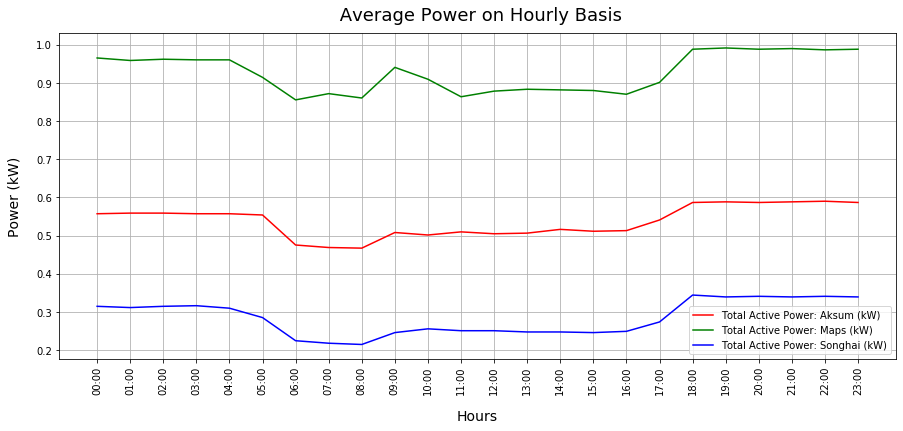

In [19]:
# Data on hourly basis
fig = plt.figure(figsize=(15, 6)) # Setting the right size for the graph
ax = plt.gca() # gca stands for 'get current axis'

## Monthly basis - Voltage graphs for sum
Aksum_res_hour.plot(kind='line', y=['Total Active Power: Aksum (kW)'], color=['red'], ax=ax)
Maps_res_hour.plot(kind='line', y=['Total Active Power: Maps (kW)'], color=['green'], ax=ax)
Songhai_res_hour.plot(kind='line', y=['Total Active Power: Songhai (kW)'], color=['blue'], ax=ax)

plt.title(" Average Power on Hourly Basis", fontsize=18, y=1.02)
plt.xlabel("Hours", fontsize=14, labelpad=15)
plt.ylabel("Power (kW)", fontsize=14, labelpad=15)
plt.xticks(Aksum_res_hour.index, rotation=90)
plt.grid(True)
#fig.savefig(r'C:\Users\MILTON ABREU\Documents\Data_books\Graphs\Voltage_sum2.jpg')# uncomment to save the image

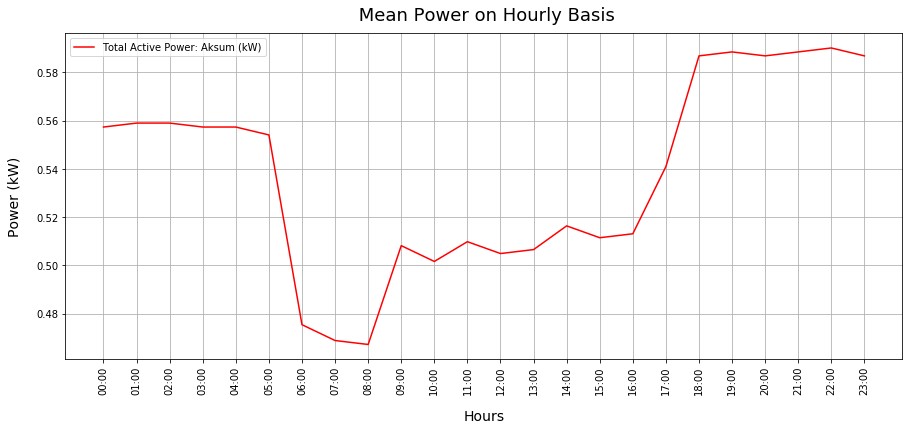

In [20]:
# Data on hourly basis
fig = plt.figure(figsize=(15, 6)) # Setting the right size for the graph
ax = plt.gca() # gca stands for 'get current axis'

## Monthly basis - Voltage graphs for sum
Aksum_res_hour.plot(kind='line', y=['Total Active Power: Aksum (kW)'], color=['red'], ax=ax)
#Maps_res_hour.plot(kind='line', y=['Total Active Power: Maps (kW)'], color=['green'], ax=ax)
#Songhai_res_hour.plot(kind='line', y=['Total Active Power: Songhai (kW)'], color=['blue'], ax=ax)

plt.title(" Mean Power on Hourly Basis", fontsize=18, y=1.02)
plt.xlabel("Hours", fontsize=14, labelpad=15)
plt.ylabel("Power (kW)", fontsize=14, labelpad=15)
plt.xticks(Maps_res_hour.index, rotation=90)
plt.grid(True)
#fig.savefig(r'C:\Users\MILTON ABREU\Documents\Data_books\Graphs\Voltage_sum2.jpg')# uncomment to save the image

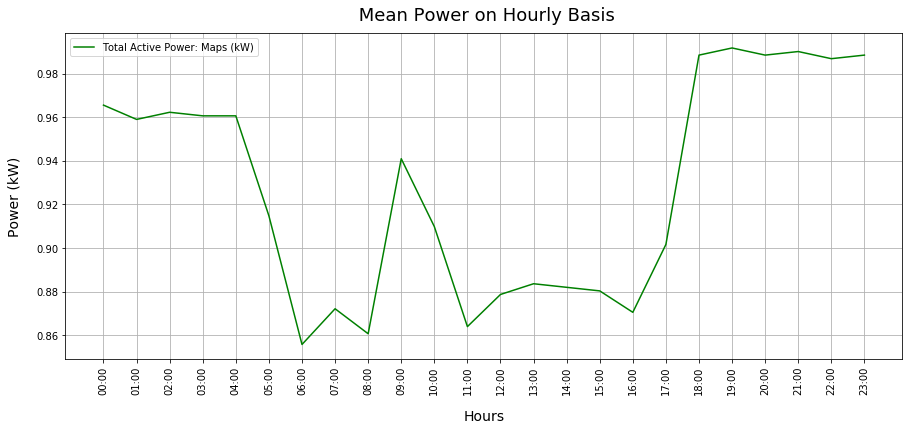

In [21]:
# Data on hourly basis
fig = plt.figure(figsize=(15, 6)) # Setting the right size for the graph
ax = plt.gca() # gca stands for 'get current axis'

## Monthly basis - Voltage graphs for sum
#Aksum_res_hour.plot(kind='line', y=['Total Active Power: Aksum (kW)'], color=['red'], ax=ax)
Maps_res_hour.plot(kind='line', y=['Total Active Power: Maps (kW)'], color=['green'], ax=ax)
#Songhai_res_hour.plot(kind='line', y=['Total Active Power: Songhai (kW)'], color=['blue'], ax=ax)

plt.title(" Mean Power on Hourly Basis", fontsize=18, y=1.02)
plt.xlabel("Hours", fontsize=14, labelpad=15)
plt.ylabel("Power (kW)", fontsize=14, labelpad=15)
plt.xticks(Aksum_res_hour.index, rotation=90)
plt.grid(True)
#fig.savefig(r'C:\Users\MILTON ABREU\Documents\Data_books\Graphs\Voltage_sum2.jpg')# uncomment to save the image

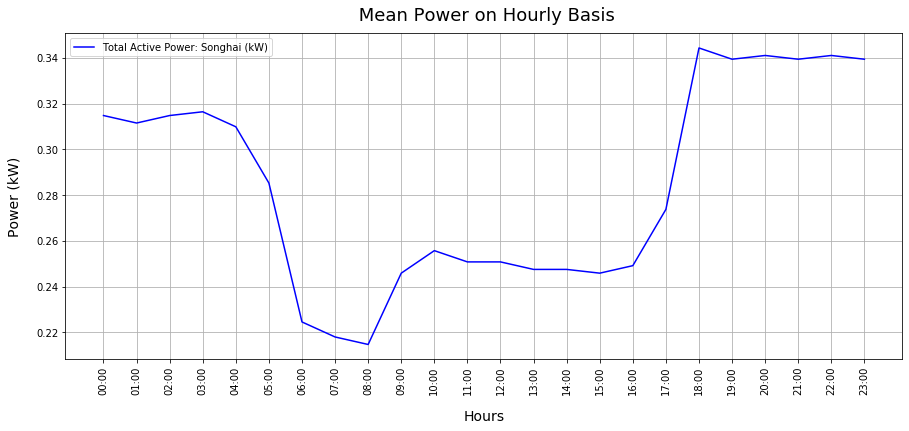

In [22]:
# Data on hourly basis
fig = plt.figure(figsize=(15, 6)) # Setting the right size for the graph
ax = plt.gca() # gca stands for 'get current axis'

## Monthly basis - Voltage graphs for sum
#Aksum_res_hour.plot(kind='line', y=['Total Active Power: Aksum (kW)'], color=['green'], ax=ax)
#Maps_res_hour.plot(kind='line', y=['Total Active Power: Maps (kW)'], color=['red'], ax=ax)
Songhai_res_hour.plot(kind='line', y=['Total Active Power: Songhai (kW)'], color=['blue'], ax=ax)

plt.title(" Mean Power on Hourly Basis", fontsize=18, y=1.02)
plt.xlabel("Hours", fontsize=14, labelpad=15)
plt.ylabel("Power (kW)", fontsize=14, labelpad=15)
plt.xticks(Aksum_res_hour.index, rotation=90)
plt.grid(True)
#fig.savefig(r'C:\Users\MILTON ABREU\Documents\Data_books\Graphs\Voltage_sum2.jpg')# uncomment to save the image

## Insights

After looking at the load profile of the ALC premises in the non-academic period, it was verified that all electrical power issues revealed during the analysis pointed to one major big cause. Design and installation of the electrical circuits in the ALC. Failure or inappropriate design of these premises may be the only reasonable option in explaining these irregularities... The occupants consumption is only following the picture of the design... does not matter how much they consume, the residence will alway dictate how the power flows.

In [28]:
Songhai_res_hour[['Voltage Red-Phase: Songhai (V) ', 'Voltage White-Phase: Songhai (V)','Voltage Blue-Phase: Songhai (V) ', 'Current Red-Phase: Songhai (A)','Current White-Phase: Songhai (A)', 'Current Blue-Phase: Songhai (A)','Total Active Power: Songhai (kW)', 'Frequency (Hz): Songhai ']]

,Voltage Red-Phase: Songhai (V),Voltage White-Phase: Songhai (V),Voltage Blue-Phase: Songhai (V),Current Red-Phase: Songhai (A),Current White-Phase: Songhai (A),Current Blue-Phase: Songhai (A),Total Active Power: Songhai (kW),Frequency (Hz): Songhai
Date,,,,,,,,
00:00:00,238.252459,238.195082,237.768852,0.875410,1.000000,0.847541,0.314754,50.050820
01:00:00,238.285246,238.206557,237.813115,0.875410,1.000000,0.844262,0.311475,50.054098
02:00:00,238.526230,238.465574,238.067213,0.877049,1.000000,0.836066,0.314754,50.057377
03:00:00,238.532787,238.460656,238.080328,0.878689,1.000000,0.845902,0.316393,50.077049
04:00:00,238.237705,238.147541,237.795082,0.875410,1.000000,0.831148,0.309836,49.998361
05:00:00,237.960656,237.890164,237.542623,0.877049,0.998361,0.740984,0.285246,50.004918
06:00:00,238.052459,238.050820,237.732787,0.880328,0.990164,0.478689,0.224590,50.036066
07:00:00,237.254098,237.301639,236.962295,0.875410,0.985246,0.472131,0.218033,50.013115
08:00:00,236.477049,236.572131,236.203279,0.881967,1.001639,0.470492,0.214754,50.021311
